In [1]:
import pandas as pd

# pandas 缺失值简介

## 缺失值的表现形式

In [2]:
import numpy as np
print(np.NaN)
print(np.NAN)
print(np.nan)

nan
nan
nan


In [3]:
print(np.NaN==True)
print(np.NaN==False)
print(np.NaN==0)
print(np.NaN=='')
print(np.NaN==None)

False
False
False
False
False


In [4]:
print(np.NaN==np.NaN)
print(np.NaN==np.nan)
print(np.NaN==np.NAN)
print(np.NAN==np.nan)

False
False
False
False


## 缺失值判断

**pandas 判断是否为缺失值方法**：
pd.isnull和pd.notnull

In [5]:
print(pd.isnull(np.NaN))
print(pd.isnull(np.nan))
print(pd.isnull(np.NAN))

True
True
True


In [6]:
print(pd.notnull(np.NaN))
print(pd.notnull(42))

False
True


**判断 Series 中的元素是否是缺失值**：series.isnull()

In [7]:
# 创建一个包含缺失值的 Series 数据
series = pd.Series([1, 3, np.NaN, 2, np.NaN, 5])
series

0    1.0
1    3.0
2    NaN
3    2.0
4    NaN
5    5.0
dtype: float64

In [8]:
# 判断 Series 中的元素是否为 NaN 值
series.isnull()

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

In [9]:
# 计算 Series 中 NaN 值的数量
series.isnull().sum()

2

**判断 DataFrame 中的数据是否是缺失值**：df.isnull()

In [10]:
# 创建一个包含缺失值的 DataFrame 数据
df = pd.DataFrame([
    [1, np.NaN, 3],
    [np.NaN, 2, 1],
    [np.NaN, 3, np.NaN]
], columns=['A', 'B', 'C'])
df

,A,B,C
0,1.0,NaN,3.0
1,NaN,2.0,1.0
2,NaN,3.0,NaN


In [11]:
# 判断 DataFrame 中的每个元素是否为缺失值
df.isnull()

,A,B,C
0,False,True,False
1,True,False,False
2,True,False,True


In [12]:
# 计算 DataFrame 中每一列的缺失值数量
df.isnull().sum()

A    2
B    1
C    1
dtype: int64

## 加载包含缺失值的数据

**加载包含缺失值的数据：survey_visited.csv**

In [13]:
# 加载包含缺失值的数据
pd.read_csv('./data/survey_visited.csv')

,ident,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1939-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26
5,752,DR-3,NaN
6,837,MSK-4,1932-01-14
7,844,DR-1,1932-03-22


**加载数据时，不显示默认的缺失值，默认缺失值填充为''**

In [14]:
# 加载数据时，不显示默认的缺失值，默认缺失值填充为''
pd.read_csv('./data/survey_visited.csv', keep_default_na=False)

,ident,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1939-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26
5,752,DR-3,
6,837,MSK-4,1932-01-14
7,844,DR-1,1932-03-22


**na_values=["DR-3"]：加载数据时，把 'DR-3' 当做缺失值**

In [15]:
# na_values=["DR-3"]：加载数据时，把 'DR-3' 当做缺失值
pd.read_csv('./data/survey_visited.csv', na_values=["DR-3"], keep_default_na=False)

,ident,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,NaN,1939-01-07
3,735,NaN,1930-01-12
4,751,NaN,1930-02-26
5,752,NaN,
6,837,MSK-4,1932-01-14
7,844,DR-1,1932-03-22


# pandas 缺失值处理

##  加载数据并查看缺失情况

### 数据基本缺失情况查看

**加载包含缺失值的数据：titanic_train.csv**

In [17]:
# 加载数据
train = pd.read_csv('./data/titanic_train.csv')
print(train.shape)
train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 构造缺失值统计的函数

In [18]:
def missing_values_table(df):
    # 计算所有的缺失值
    mis_val = df.isnull().sum()

    # 计算缺失值的比例
    mis_val_percent = 100 * mis_val / len(df)

    # 将结果拼接成 DataFrame
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # 将列重命名
    mis_val_table.columns = ['缺失值', '占比(%)']

    # 将缺失值为0的列去除，并按照缺失值占比进行排序
    mis_val_table_sorted = mis_val_table[mis_val_table['缺失值']!=0].sort_values(
        '占比(%)', ascending=False)

    # 打印信息
    print(f'传入的数据集共{df.shape[1]}列，\n其中{mis_val_table_sorted.shape[0]}列有缺失值')

    return mis_val_table_sorted

In [19]:
# 查看缺失值情况
missing_values_table(train)

传入的数据集共12列，
其中3列有缺失值


,缺失值,占比(%)
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


### 使用Missingno库对缺失值的情况进行可视化探查

In [20]:
# pip安装missingno
pip install missingno

SyntaxError: invalid syntax (1748766117.py, line 2)

<AxesSubplot:>

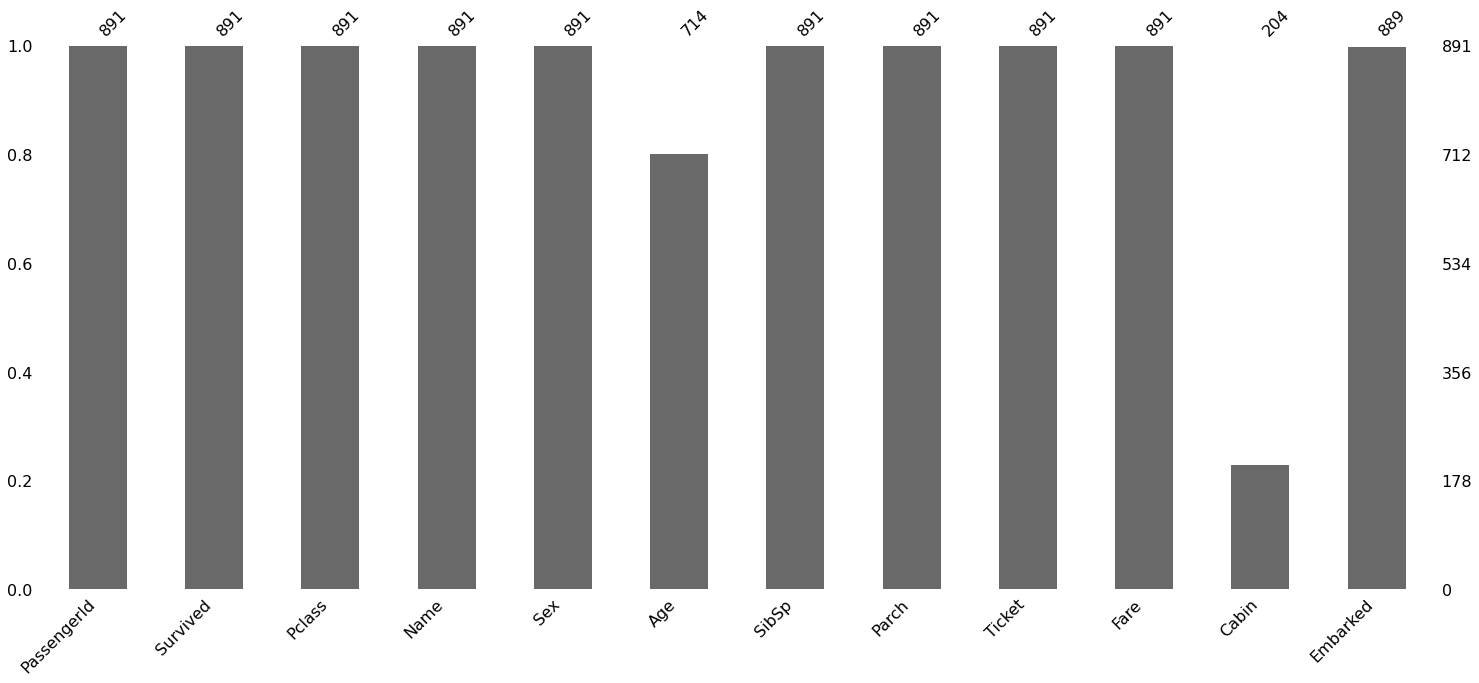

In [21]:
import missingno as msno
msno.bar(train)

<AxesSubplot:>

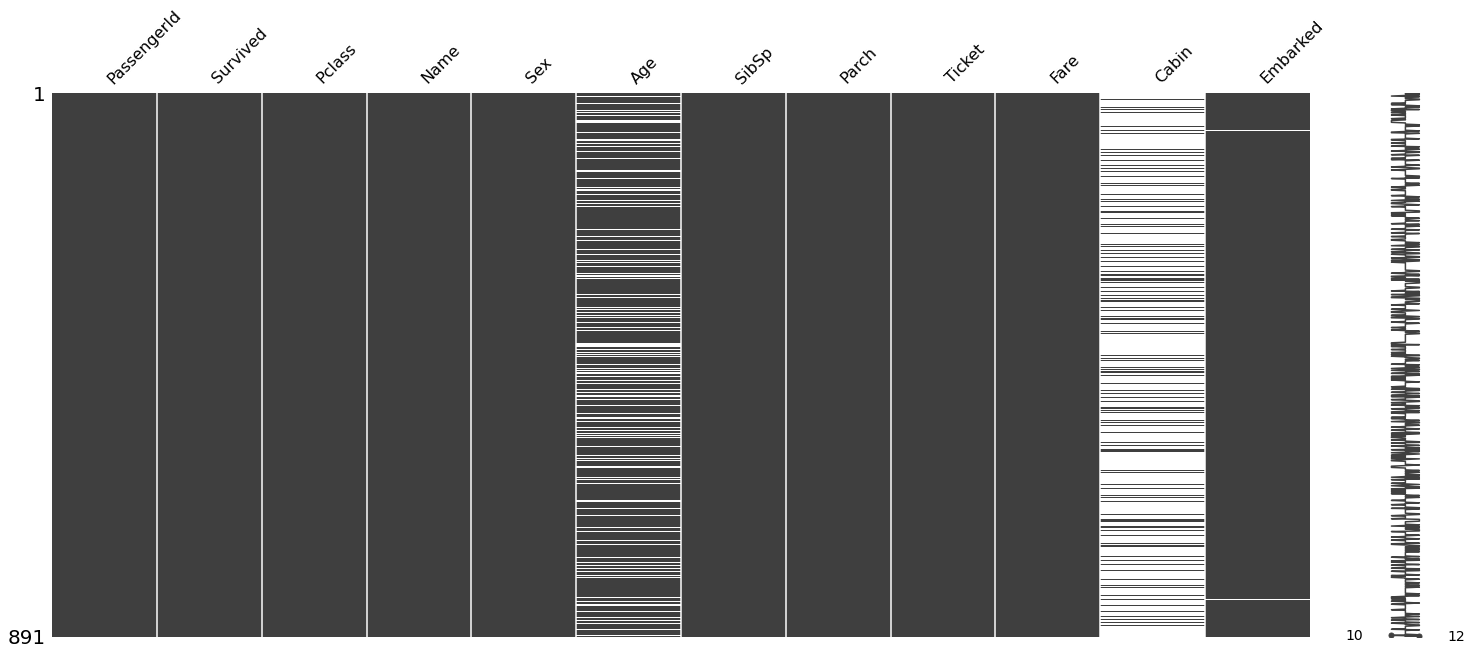

In [22]:
# 查看缺失值分布
msno.matrix(train)

<AxesSubplot:>

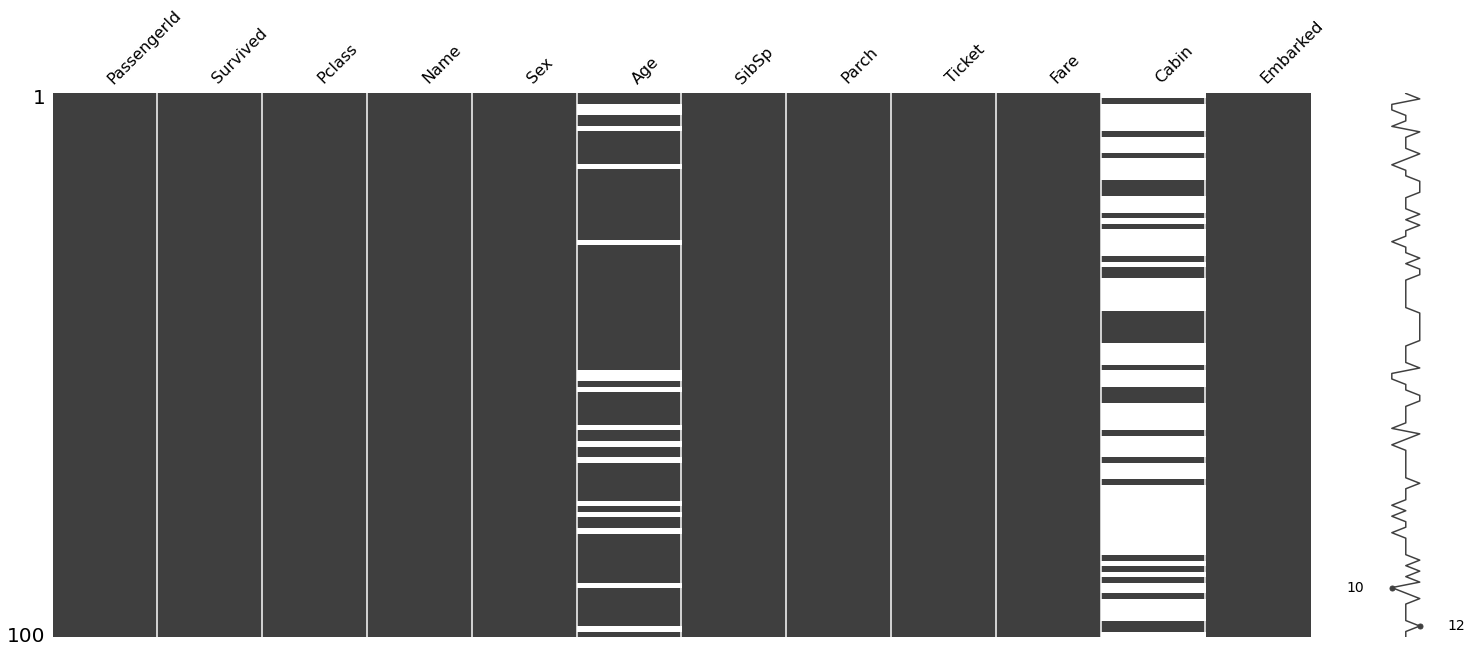

In [23]:
# 随机从 train 数据中取出 100 条数据，查看缺失值分布情况
msno.matrix(train.sample(100))

<AxesSubplot:>

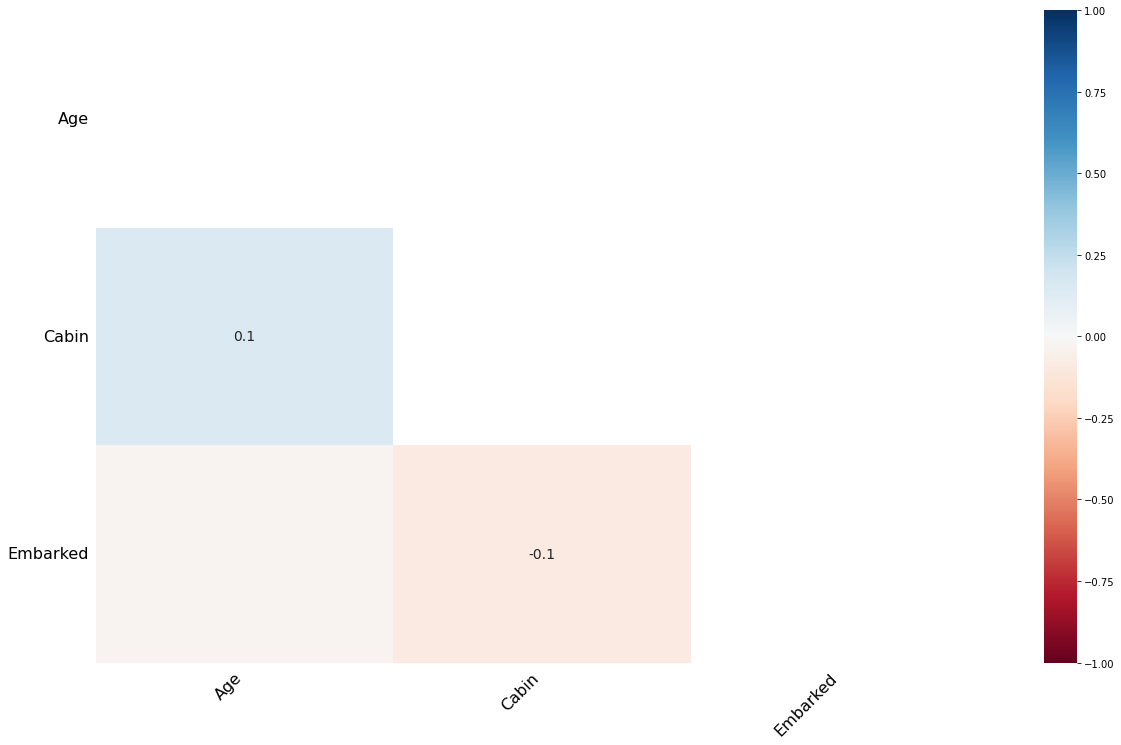

In [24]:
# 热力图
msno.heatmap(train)

<AxesSubplot:>

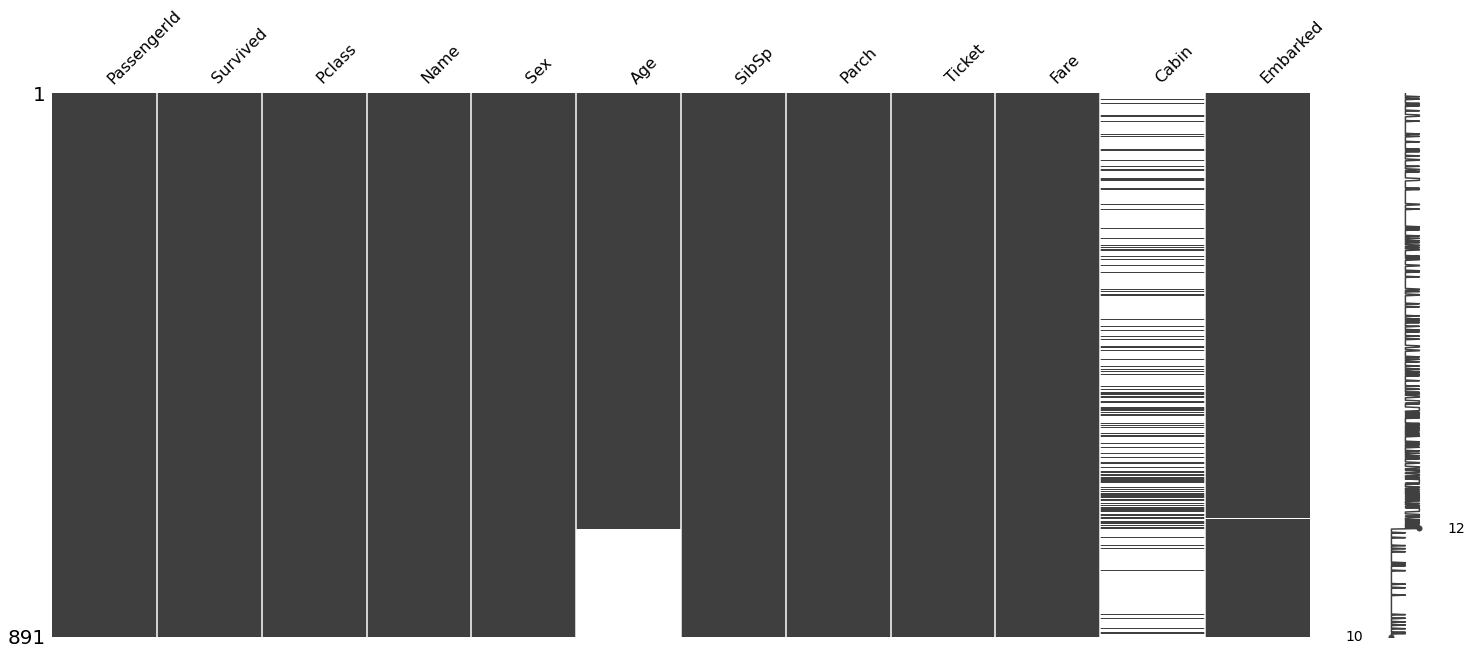

In [25]:
_sorted = train.sort_values('Age')
msno.matrix(_sorted)

0


<AxesSubplot:>

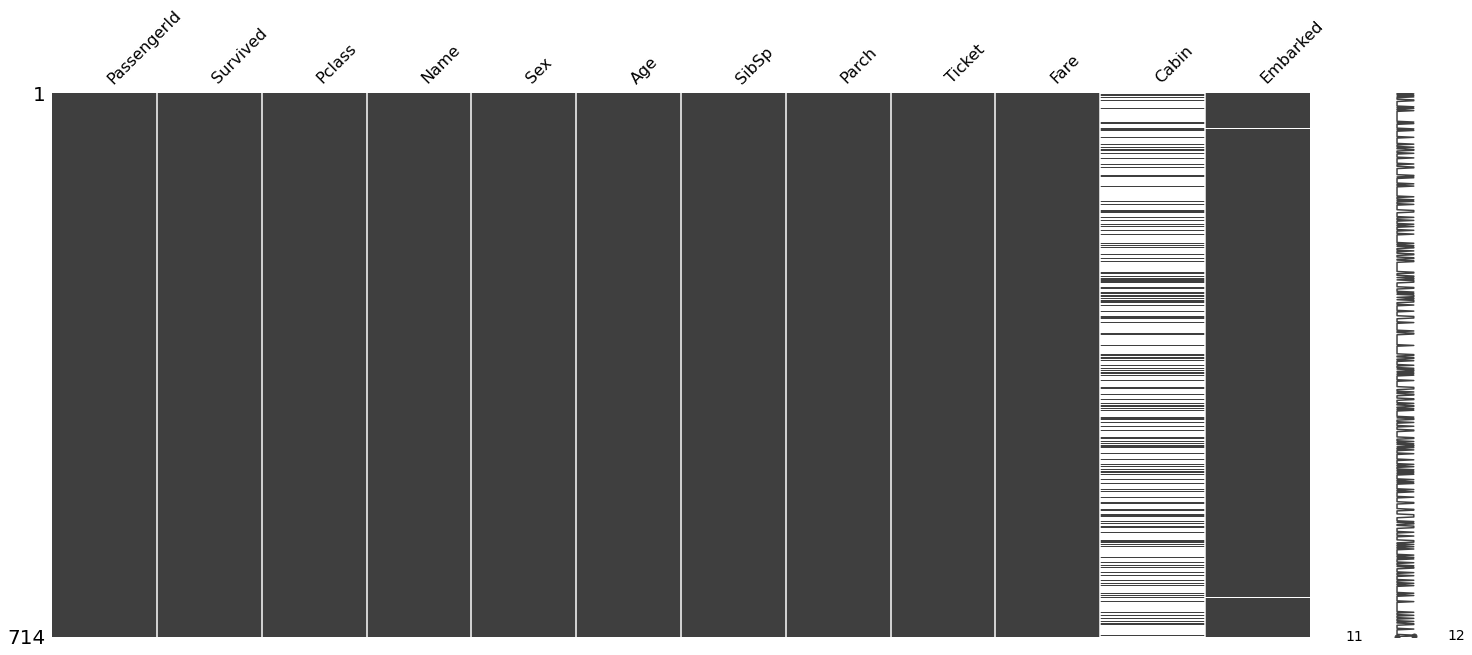

In [26]:
# 复制一份数据
train_cp = train.copy() 
# 对Age列进行处理，空值就删除整行数据
train_cp.dropna(subset=['Age'], how='any', inplace=True)
# 输出Age列缺失值的总数
print(train_cp['Age'].isnull().sum())
# 图形化缺失值情况
msno.matrix(train_cp)

<AxesSubplot:>

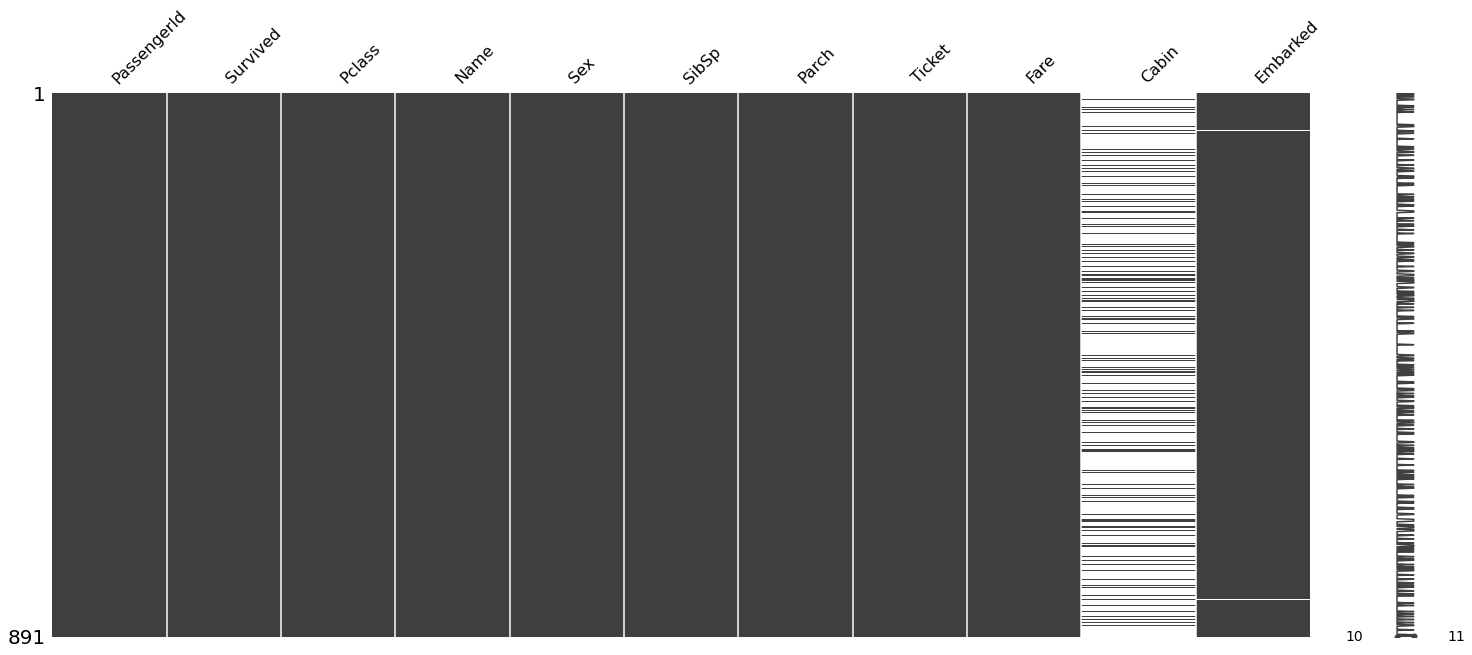

In [27]:
# 复制一份数据
train_cp = train.copy() 
# 对Age列进行处理，空值就删除整行数据
train_cp.drop(['Age'], axis=1, inplace=True)
# 图形化缺失值情况
msno.matrix(train_cp)

In [28]:
# 复制一份数据
train_constant = train.copy()
# 计算各列空值总数
print('填充缺失值之前：')
print(train_constant.isnull().sum())

# 将空值都填为0，inplace=True为必要参数
train_constant.fillna(0, inplace=True)

# 计算各列空值总数
print('填充缺失值之后：')
print(train_constant.isnull().sum())

填充缺失值之前：
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
填充缺失值之后：
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [29]:
# 复制一份数据
train_mean = train.copy()
# 计算年龄的平均值
age_mean = train_mean['Age'].mean()
print(age_mean)
# 使用年龄的平均值填充 Age 列的缺失值
train_mean['Age'].fillna(age_mean, inplace=True)
train_mean.isnull().sum()

29.69911764705882


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [30]:
city_day = pd.read_csv('./data/city_day.csv', parse_dates=True, index_col='Date')
# 复制一份数据
city_day_cp = city_day.copy()
# 查看数据的前 5 行
city_day_cp.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
2015-01-02,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2015-01-03,Ahmedabad,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
2015-01-04,Ahmedabad,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
2015-01-05,Ahmedabad,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [31]:
city_day_missing = missing_values_table(city_day_cp)
city_day_missing

传入的数据集共15列，
其中14列有缺失值


,缺失值,占比(%)
Xylene,18109,61.322001
PM10,11140,37.723071
NH3,10328,34.973418
Toluene,8041,27.229014
Benzene,5623,19.041008
AQI,4681,15.851139
AQI_Bucket,4681,15.851139
PM2.5,4598,15.570079
NOx,4185,14.171549
O3,4022,13.619586


In [32]:
# 截取一小部分数据用于填充效果查看
city_day['Xylene'][50:64]

Date
2015-02-20     7.48
2015-02-21    15.44
2015-02-22     8.47
2015-02-23    28.46
2015-02-24     6.05
2015-02-25     0.81
2015-02-26      NaN
2015-02-27      NaN
2015-02-28      NaN
2015-03-01     1.32
2015-03-02     0.22
2015-03-03     2.25
2015-03-04     1.55
2015-03-05     4.13
Name: Xylene, dtype: float64

In [33]:
# 填充缺失值
city_day.fillna(method='ffill', inplace=True)
# 截取一小部分数据查看填充效果
city_day['Xylene'][50:64]

Date
2015-02-20     7.48
2015-02-21    15.44
2015-02-22     8.47
2015-02-23    28.46
2015-02-24     6.05
2015-02-25     0.81
2015-02-26     0.81
2015-02-27     0.81
2015-02-28     0.81
2015-03-01     1.32
2015-03-02     0.22
2015-03-03     2.25
2015-03-04     1.55
2015-03-05     4.13
Name: Xylene, dtype: float64

In [34]:
# 查看缺失值比例
missing_values_table(city_day)

传入的数据集共15列，
其中5列有缺失值


,缺失值,占比(%)
NH3,2009,6.803021
PM10,1594,5.397718
AQI,28,0.094816
AQI_Bucket,28,0.094816
PM2.5,27,0.091429


In [35]:
# 截取一小部分数据用于填充效果查看
city_day['AQI'][20:30]

Date
2015-01-21      NaN
2015-01-22      NaN
2015-01-23      NaN
2015-01-24      NaN
2015-01-25      NaN
2015-01-26      NaN
2015-01-27      NaN
2015-01-28      NaN
2015-01-29    209.0
2015-01-30    328.0
Name: AQI, dtype: float64

In [36]:
# 填充缺失值
city_day.fillna(method='bfill', inplace=True)
# 截取一小部分数据查看填充效果
city_day['AQI'][20:30]

Date
2015-01-21    209.0
2015-01-22    209.0
2015-01-23    209.0
2015-01-24    209.0
2015-01-25    209.0
2015-01-26    209.0
2015-01-27    209.0
2015-01-28    209.0
2015-01-29    209.0
2015-01-30    328.0
Name: AQI, dtype: float64